In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
import numpy as np

In [4]:
# 이미지 파일 불러오기
img = Image.open('./resources/original.png') 
img = img.convert('L')
img_org = img
print('img.size : {}'.format(img.size))  # (width, height)

# 이미지를 너비, 높이를 4배 씩 축소하기
img_resized = img.resize((int(img.size[0]/4), int(img.size[1]/4)))
print('resized img size : {}'.format(img_resized.size))

# 이미지 파일을 np.asarray를 이용해 배열로 만들기
img_org = np.asarray(img_org, dtype='float32')
img_resized = np.asarray(img_resized, dtype='float32')

img.size : (460, 259)
resized img size : (115, 64)


In [5]:
img2 = []
for i in range(int(img_org.shape[0]/4)):  # 행(row)
    for j in range(int(img_org.shape[1]/4)):  # 열 (column)
        tmp = []
        for m in range(4):  # 4 x 4 행렬의 행 
            for n in range(4):  # 4 x 4 행렬의 열
                tmp.append(img_org[4*i+m, 4*j+n])
        img2.append(np.mean(tmp))

img_r = np.asarray(img2).reshape(64, -1)

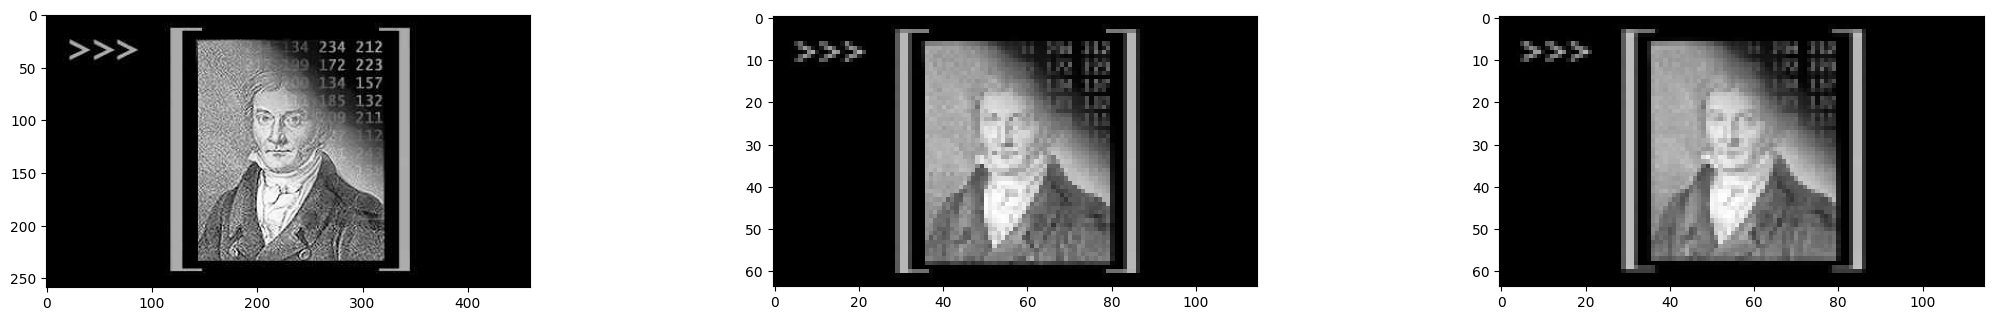

In [6]:
fig, axs = plt.subplots(1, 3, figsize=(25, 5))
fig.subplots_adjust(hspace = .5, wspace=.5)

img_list = [img_org, img_r, img_resized]
title_list = ['original', 'downsample', 'resizing']

for i, img in enumerate(img_list):
    axs[i].imshow(img ,cmap='Greys_r')

In [ ]:
from resources.vec import Vec
from resources.matutil import rowdict2mat

D = {'radio', 'sensor', 'memory', 'CPU'}
v0 = Vec(D, {'radio':.1, 'CPU':.3})
v1 = Vec(D, {'sensor':.2, 'CPU':.4})
v2 = Vec(D, {'memory':.3, 'CPU':.1})
v3 = Vec(D, {'memory':.5, 'CPU':.4})
v4 = Vec(D, {'radio':.2, 'CPU':.5})

b = Vec({0,1,2,3,4}, {0:140, 1:170, 2:60, 3:170, 4:250})
A = rowdict2mat([v0,v1,v2,v3,v4])
rate = np.linalg.solve(A,b)
rate

In [13]:
# 삼각행렬
m = np.matrix([[1,2,3],[4,5,6],[7,8,9],[10,11,12]])

ut = np.triu(m, -1)
print(ut)

[[ 1  2  3]
 [ 4  5  6]
 [ 0  8  9]
 [ 0  0 12]]


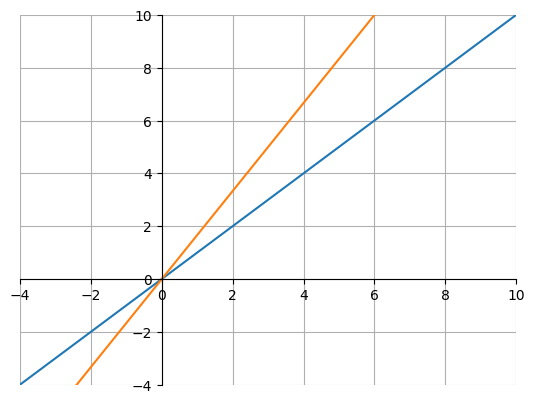

In [14]:
X = np.linspace(-4, 10, num=50, endpoint=True)
M = np.matrix([[2, 1], [2, 3]])

Y = X
mv = np.dot(M, np.column_stack((X, Y)).T)

fig, ax = plt.subplots()

for spine in ['left', 'bottom']:
    ax.spines[spine].set_position('zero')

# Hide the other spines...  
for spine in ['right', 'top']:
    ax.spines[spine].set_color('none')
    
ax.plot(X, Y)
ax.plot(mv.T[:,0], mv.T[:,1])
ax.axis([-4, 10, -4, 10])
ax.grid()

plt.show()